Start by copying this into your Google Drive!!

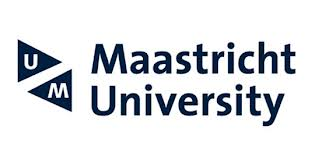
#Faculty of Science and Engineering - Department of Advanced Computer Sciences
# Course Information Retrieval and Text Mining - Tutorial Tokenization

By Jan Scholtes- Version 2025-2026


Welcome to the tutorial on Tokenization. In this notebook you will learn how to preprocess text into tokens.

This is the basis of any Information Retrieval, Text Mining or NLP process. Tokenization is closely related to sentence detection, stemming, lemmatization and is part of the large NLP research topic named morphology.

Tokenization is highly language dependent. In this tutorial we focus on Western-European languages.

In this notebook, we will use the Stanford NLTK library.



# Phase 1: The Tokenization Problem in the Real World

Before we dive into technical solutions, let's understand why tokenization is a critical problem in Information Retrieval and NLP.

## Problem 1: Information Retrieval Failure

Imagine you're searching for information about "New York City".

**Without proper tokenization:**
- System splits on spaces: "New", "York", "City"
- Returns results mentioning "New" separately from "York" and "City"
- You get irrelevant results about "new products" and "city maps"

**With proper tokenization:**
- System recognizes "New York City" as a named entity
- Returns highly relevant articles about New York City
- Search precision increases significantly

**Real-world impact:** E-commerce searches, news aggregation, legal document retrieval

## Problem 2: Morphological Confusion

Consider these words: "running", "runs", "runner"

**Without morphological processing:**
- These are treated as 3 completely separate, unrelated concepts
- Statistical analysis treats them as independent events
- If "running" appears 5 times and "runs" appears 3 times, system sees 8 separate instances

**With lemmatization/stemming:**
- All three map to the common root: "run"
- Combined frequency: 8 instances of the concept "run"
- Statistical significance improves, algorithms work better

**Real-world impact:** Text classification, sentiment analysis, topic modeling

## Problem 3: Out-of-Vocabulary Catastrophe

Consider a rare word: "unfathomable"

**Traditional word-level tokenizers:**
- If the word isn't in their training vocabulary, it becomes `[UNK]` (unknown token)
- System has NO idea what this word means
- Complete loss of information

**Modern subword tokenizers (WordPiece):**
- Even if "unfathomable" isn't in vocabulary, it can be broken down
- Becomes: ["un", "fath", "##om", "##able"]
- System can understand morphological structure and partial meaning
- Graceful degradation instead of complete failure

**Real-world impact:** Handling rare words, slang, misspellings, technical terminology, multilingual text

## Problem 4: Domain-Specific Ambiguity

The same text needs different tokenization for different domains:

**E-commerce Example:**
- Product: "iPhone 13 Pro Max"
- Bad tokenization: Treats "Pro" and "Max" separately
- Good tokenization: Recognizes "Pro Max" as a product tier
- Impact: Users searching for "Pro Max phones" find what they want

**Medical Example:**
- Diagnosis: "Type 2 Diabetes Mellitus"
- Bad tokenization: ["Type", "2", "Diabetes", "Mellitus"]
- Good tokenization: ["Type 2 Diabetes Mellitus"] (one medical concept)
- Impact: Drug recommendations, diagnostic coding accuracy

**Legal Example:**
- Contract term: "Act of God"
- Bad tokenization: Three separate words with no connection
- Good tokenization: Single legal/insurance concept
- Impact: Contract analysis, risk assessment, liability determination

## Interactive Challenge: Predict Tokenization Outputs

Before we show you how to tokenize text, try to predict the outcomes!

**Text samples to tokenize:**
1. "don't" - Does the apostrophe split it?
2. "john.doe@example.com" - How does email get split?
3. "Dr. Smith" - What happens to abbreviations?
4. "award-winning" - Does the hyphen cause a split?
5. "U.S.A." - Multiple dots and capitals?

**For each, ask yourself:**
- Should it be 1 token or multiple?
- What would a search engine need?
- What would a language model need?

We'll test your predictions with real tokenizers in the next sections!

# Phase 2: Understanding the Long Tail - Why Preprocessing Matters

Natural language exhibits a remarkable property: **most words are rare**.

A few words (the, a, is, and, ...) appear extremely frequently, while most words appear only occasionally. This is called **Zipf's Law** or the "long tail distribution".

## Why This Matters for IR and NLP

**For Information Retrieval (Historical Perspective):**
- In the 1970s-1990s, computer memory was expensive and limited
- Idea: Remove the most frequent words ("stop words") to save space and improve relevance
- Result: Faster search, smaller indexes, but loss of search capability for phrases like "to be or not to be"

**For Modern NLP:**
- GPU memory is still valuable, but rarely the limiting factor
- Frequency information is actually useful for context and meaning
- Neural models (transformers) learn that context words help determine meaning
- Modern best practice: **Keep stop words** with neural models

**The Long Tail Property Means:**
- Most words are rare → algorithms need sufficient data to learn statistics
- Morphological processing helps group related rare words
- Rare words are often the most informative (e.g., "diabetes" > "the")
- Better preprocessing → Better statistical significance → Better algorithm performance

Text extraction and cleanup is an important component of real-world NLP systems. Text extraction allows one to extract text from various electronic file formats (TXT, HTML, XML, PDF, DOCX, XLSX, PPTX, ...) and deals with the encoding of the characters (Unicode, UTF-8, Code pages or ACSII).

Libraries such as BeautifulSoup, Scapy or Selenium can assist you with webscraping and parsing text from HTML and XML.

You can run the example hereunder to see how a Webpage is scraped and parsed into tags, which can subsequently be questioned (remove the # before this line:"pprint(soupified.prettify())" to see the entire HTML file (it is long).

In [ ]:
# making the necessary imports,
from pprint import pprint
from bs4 import BeautifulSoup
from urllib.request import urlopen, Request
import urllib

myurl = "https://stackoverflow.com/questions/415511/how-to-get-the-current-time-in-python"

# Create a Request object with a user agent to mimic a browser
req = Request(myurl, headers={'User-Agent': 'Mozilla/5.0'})

# Now use the Request object with urlopen
html = urlopen(req).read() # query the website so that it returns a html page  \n"
soupified = BeautifulSoup(html, 'html.parser') # parse the html in the 'html' variable, and store it in Beautiful Soup format"

#pprint(soupified.prettify())      # for printing the full HTML structure of the webpage

question = soupified.find("div", {"class": "question"}) # find the nevessary tag and class which it belongs to
questiontext = question.find("div", {"class": "s-prose js-post-body"})
print("Question: \n", questiontext.get_text().strip())
answer = soupified.find("div", {"class": "answer"}) # find the nevessary tag and class which it belongs to
answertext = answer.find("div", {"class": "s-prose js-post-body"})
print("Best answer: \n", answertext.get_text().strip())

PDF can be quite challenging, especially from a formatting point of view. There are also many PDF reverse engineered formats that do not follow the official PDF guideliness completely. For popular formats from Microsoft, Google, Open Office and other vendors, there are several open source libraries to exract text and meta data. For more obscure file types, one has to fall back to commercial solutions such as Oracle Outside In, but these can be expensive.

Encoding normalization is important to map various variants of code pages (https://en.wikipedia.org/wiki/Code_page ), ASCII and other encodings to one common Unicode format (https://home.unicode.org/). UTF-8 is the most used one.

In this tutorial, we presume all this has been done and we can start with UTF-8 text files that only contain basic line (CR-LF) and tab formatting.

#NLTK

First we load NLTK

In [ ]:
import nltk
nltk.download('punkt') # load tokenization
nltk.download('punkt_tab')

NLTK also contains many text corpora. Let's import the movie reviews.

In [ ]:
nltk.download('movie_reviews')
from nltk.corpus import movie_reviews
movie_reviews.readme()

Let's see what is in there

In [ ]:
raw = movie_reviews.raw()
print(raw[0:1000:1]) # print first 1000 chars


Let's see if we can detect the long tail that is typical for natural language. First we seperate the text in indivudual words, then we run a frequency analsyis on the results.

In [ ]:
corpus = movie_reviews.words()
print(corpus)
freq_dist = nltk.FreqDist(corpus)
print(freq_dist)
print(freq_dist.most_common(50))
freq_dist.plot(500)

## Observations from the Long Tail

What you're seeing is **Zipf's Law in action**:
- A few words (the, and, a, ...) dominate the corpus
- Most words appear very rarely (thousands of unique words appear only once)
- This creates a characteristic "long tail" distribution when plotted

**Historical Consequence for IR:**
For decades, systems removed these frequent words ("stop words") because they:
- Waste storage space
- Add noise to relevance calculations
- Don't help distinguish between documents

**Modern Consequence for NLP:**
Today we know:
- Frequency information carries meaning
- Context words help disambiguate rare words
- Stop word removal often HURTS neural network performance
- Better to keep them and let the model learn what's important

## Exercise 1: Analyzing the Long Tail Distribution

a. **What do you observe in the frequency distribution?**
   - How many unique words appear only once?
   - How many words make up 50% of the corpus?
   - Describe the shape of the distribution

b. **What are the most frequent words? Are they meaningful?**
   - List the top 10 most frequent words
   - Which of these would help you understand what a movie review is about?
   - Which ones would mislead you?

c. **Why is this property relevant for Information Retrieval?**
   - If you removed the 100 most frequent words, how much would corpus size shrink?
   - If you removed them, what queries would become impossible?
   - Example: "To be or not to be" - what remains after stop word removal?

d. **How can we use this property to optimize our algorithms?**
   - What if we gave rare words higher weight in similarity calculations?
   - What if we used morphological processing to group similar words?
   - How would grouping "reviewed", "reviews", "reviewer" help?

ANSWER HERE

As you can also observe, punctuation characters such as .  and , and other ones (: ; " " ? ! ) are still in there. This is where tokenization comes in. Tokenization removes punctuations where they are used as sentence and phrase seperation, but leaves them where they are part of a token (e.g. an email address or abbreviation).  

#Sentence Detection

Next, we load the NLTK tokenizer for sentences (sent_tokenize) and for words (word_tokenize)

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [ ]:
my_text = "The Department of Advanced Computing Sciences - sometimes abbreviated as DACS - \n is Maastricht University’s largest and oldest department \n broadly covering the fields of artificial intelligence, data science, computer science, \n mathematics and robotics. We maintain a large network of public and \n private partners through our research collaborations and through the \n award-winning KE@Work programme. In addition, our staff teaches approximately 800 bachelor’s and master’s \n students in 3 specialized study programmes in Data Science \n and Artificial Intelligence. The Department of Advanced Computing Sciences \n  is the new joint identity of the Institute of Data Science (IDS) and the former \n Department of Data Science and Knowledge Engineering (DKE)."
print(my_text)


In [ ]:
my_sentences = sent_tokenize(my_text)
# print(my_sentences) # print entire list unformatted
print("\n")
for x in range(len(my_sentences)):
    print(my_sentences[x]+"\n")

# Word Detection aka Tokenization

# Phase 3: Level 1 - Word-Level Tokenization

## Common Misconceptions About Tokenization

**Misconception 1: "All tokenizers work the same way"**
- FALSE - Different tokenizers make different design choices
- TRUTH - NLTK, spaCy, transformers, and regex tokenizers produce different results
- Implication: Choice of tokenizer affects downstream IR/NLP performance

**Misconception 2: "Punctuation should always be removed"**
- FALSE - Context matters!
- TRUTH - Some punctuation is meaningful (emails: user@domain.com, abbreviations: "Dr.", URLs)
- Implication: Blind punctuation removal can lose information

**Misconception 3: "Tokenization is one-size-fits-all"**
- FALSE - Different domains need different strategies
- TRUTH - Medical text, legal text, and code require domain-specific tokenizers
- Implication: Task and domain should guide tokenization strategy

## Tokenization Design Choices

When building a tokenizer, designers must answer:

1. **What is a token boundary?** (spaces, punctuation, morphemes?)
2. **What to do with punctuation?** (remove, keep attached, separate?)
3. **Case sensitivity?** (preserve or normalize?)
4. **Contractions and possessives?** ("don't" → ["do", "n't"] or ["don't"]?)
5. **Hyphenated words?** ("award-winning" → ["award", "-", "winning"] or ["award-winning"]?)
6. **Special symbols?** (emails, URLs, @mentions, #hashtags?)

Different answers lead to different tokenization outputs. Let's compare several strategies on the same text:

Given a character sequence and a defined document unit, tokenization is the task of chopping it up into pieces, called tokens , perhaps at the same time throwing away certain characters, such as punctuation.
A token is an instance of a sequence of characters in some particular document that are grouped together as a useful semantic unit for processing. A type is the class of all tokens containing the same character sequence.

In [ ]:
for sentence in my_sentences:
    print("Sentence: "+str(sentence))
    my_words = word_tokenize(sentence)
    print("Tokens: ")
    for x in range(len(my_words)):
      print("    "+str(my_words[x]))


As you can observe, there are still punctuation in the list of tokens. In NLTK these can be removed by using a regular expression.

In [ ]:
from nltk.tokenize import RegexpTokenizer
new_tokenizer = RegexpTokenizer(r'\w+')
for sentence in my_sentences:
    print("Sentence: "+str(sentence))
    my_words = new_tokenizer.tokenize(sentence)
    print("Tokens: ")
    for x in range(len(my_words)):
      print("    "+str(my_words[x]))

**We can make a couple of observations:**

*Standard Word Tokenization:* The tokenizer has split words effectively, separating individual words from the sentences.

It correctly separates punctuation from words (e.g., no , or . in the token list).

*Issues with Apostrophes and Hyphens:*

a. The possessive form (bachelor’s, master’s) is split into two tokens: bachelor, s and master, s.

b. award-winning is tokenized into two separate words: award and winning, instead of preserving it as a single hyphenated term.

c. KE@Work was split into KE and Work, losing the @ symbol.

*Inconsistencies in Named Entity Tokenization:*

a. DACS and DKE are preserved correctly as single tokens.

b. IDS (Institute of Data Science) is also tokenized correctly.

*Potentially Incorrect Splitting of Multi-word Terms*

a. Artificial Intelligence, Data Science, and Knowledge Engineering are split into separate words.

b. This could be problematic in contexts where multi-word expressions (MWEs) are important.


#Exercise 2:

a. How can we improve this tokenization?

b. Why is this relevant for Information Retrieval (IR) and Natural Language Processing (NLP)?

c. How can we use this knowledge to optimize IR and NLP algorithms?


YOUR ANSWER HERE

# Case Studies: When Tokenization Fails (or Succeeds)

**E-commerce:**
- Product: "iPhone 13 Pro Max"
- Poor tokenization: splits "Pro" and "Max" apart, hurting product search
- Better tokenization: keeps "Pro Max" as a tier concept; queries for "Pro Max" return the right devices

**Medical:**
- Term: "Type 2 Diabetes Mellitus"
- Poor tokenization: ["Type", "2", "Diabetes", "Mellitus"] treats them independently
- Better tokenization: recognizes it as one clinical concept → improves coding, recommendations

**Legal:**
- Phrase: "Act of God"
- Poor tokenization: three unrelated words
- Better tokenization: one legal/insurance concept → affects risk and liability analysis

# Generate a Vocabulary

A vocabulary is a data structure containing every unique word used in the corpus only once and in alphabetical order. This can be used as a dictionairy in NLP or as the basis of a search index in information retrieval.

In [ ]:
corpus_tokens = new_tokenizer.tokenize(my_text.lower()) #use the tokenizer that removes punctuation
vocab = sorted(set(corpus_tokens))
print(vocab)
print("Tokens:", len(corpus_tokens))
print("Vocabulary:", len(vocab))

#Stop Words

In the past, when computer resources were still limited, highly frequent words were often removed in information retrieval applications. These are named stop-words or noise-words. These are words such as "the, on, in, a, be, or, and, an, for, to, ...". If such a word is removed, one can no longer search for them. Imagine searching for "to be or not to be", which is no longer after noise word removal.

In text-mining and advanced NLP, these words often contain important clues on the meaning of language.

So, these days as computr resources are much larger, noise words are more often not removed.

But let's try how to remoce them using NLTK.

## When NOT to Remove Stop Words (Modern Perspective)

- Queries can break: "to be or not to be" loses meaning if stop words are removed
- Negation matters: "not good" vs "good" → removing "not" flips sentiment
- Questions: "what is AI?" → removing "what" hides the intent
- Neural models (BERT, GPT, etc.) use stop words as context; removing them usually hurts performance

**Guideline:**
- Keep stop words for modern neural models and contextual tasks
- Consider removal only for classic IR pipelines where storage/latency is critical

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
corpus_tokens = new_tokenizer.tokenize(my_text)
print("Stopwords from NLTK:", stopwords.words('english'))
stop_words_nltk = set(stopwords.words('english'))
# we use the token list without punctuations
print("Tokenized corpus:",corpus_tokens)
#now remove stopwords
tokenized_corpus_without_stopwords = [i for i in corpus_tokens if not i in stop_words_nltk]
print("Tokenized corpus without stopwords:",tokenized_corpus_without_stopwords)

## Stop Words in Context: Small Experiments

Try these thought experiments:
- Sentiment: "This movie is not good" → removing "not" changes polarity
- Question answering: "What is artificial intelligence?" → removing "what" hides that it is a question
- Query exactness: "to be or not to be" → removing stop words destroys the phrase

**Takeaway:** Keep stop words when context is important (most modern NLP tasks).

#Exercise 3:

a. What do you observe with respect to case sensitivity?

b. How can we solve that?

c. Could this actions also lead to unwanted side effects?

d. When using highly-context sensitive models such as BERT, expplain why removing stopwords is not a good idea.



ANSWER HERE

## Choosing Between Stemming, Lemmatization, or No Processing

| Word           | No Processing | Stemming  | Lemmatization | Correct Lemma |
|----------------|---------------|-----------|---------------|---------------|
| better         | better        | better    | better        | good          |
| is             | is            | is        | is            | be            |
| running        | running       | run       | running       | run (verb)    |
| richer         | richer        | richer    | richer        | rich (adj)    |

**When to use which?**
- **Stemming:** fast, good for search engines where speed > linguistic accuracy.
- **Lemmatization:** better linguistic correctness, needs POS tags; good for text analysis/extraction.
- **No processing (keep as-is):** best for modern neural models (BERT/GPT) which handle morphology internally.

#Stemming

Stemming is the process of removing suffixes and reducing the word to some base form such that all different variations of a word can be represented by one form. Stemming uses rules and may not always result in the correct linguistic base form. However, it is fast and therefor often used by search engines. As we discussed in the lecture, a well-known stemmer for the English language is the Porter stemmer.

Let's try it ...

In [ ]:
from nltk.stem import PorterStemmer
stemmer= PorterStemmer()
print("before stemming -> after stemming")
for word in corpus_tokens:
  print(str(word) + " -> " + str(stemmer.stem(word)))


As you can see, "students" is converted into "student", but "Science" is converted into "scien". There are other non-linguistically correct transformations.

#Lemmatization

This why we prefer to use lemmatization for linguistic applications other than search engines. Lemmatization is the process of mapping all tokens to its base-linguistic form: the "lemma". So "better" should be converted to "good" and "is" to "be".

In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')  # downloading wordnet
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
print("before lemmatization -> after lemmarization")
for word in corpus_tokens:
  print(str(word) + " -> " + str(lemmatizer.lemmatize(word)))

As you can observe, only plurals and other basic operations are performed. But "is" not converted to "be". Neither are several verb inflections. This is because Lemmatization requires more linguistic knowledge: it need to know whether we are dealing with, for instance, a verb, noun or a adjectice. We call these gramatical roles "part-of-speech" or POS tags. These will be discussed in the next lecture: Syntax and Semantics.

In [ ]:
print(lemmatizer.lemmatize('better'))
print(lemmatizer.lemmatize('better',pos='a')) # a for Adjective
print(lemmatizer.lemmatize('is'))
print(lemmatizer.lemmatize('is',pos='v'))  # v for Verb
print(lemmatizer.lemmatize('is',pos='a'))
print(lemmatizer.lemmatize('is',pos='n'))  # n for Noun
print(lemmatizer.lemmatize('richer',pos='n'))
print(lemmatizer.lemmatize('richer',pos='a'))




# Phase 5: The Tokenization Revolution – From Words to Subwords

Traditional tokenizers split on whitespace/punctuation and rely on fixed vocabularies. Modern transformer models (BERT, RoBERTa, etc.) use **subword tokenization** (e.g., WordPiece) to:
- Handle rare and out-of-vocabulary (OOV) words gracefully
- Capture morphology (play + ##ing, play + ##er)
- Support multilingual text with a compact vocabulary
- Reduce [UNK] tokens by breaking words into known pieces

## WordPiece Tokenization (Mandatory)

WordPiece is the subword tokenizer used by BERT-family models. It:
- Uses a ~30k subword vocabulary
- Splits unseen/rare words into known pieces (prefix `##` marks continuation)
- Greatly reduces `[UNK]` tokens
- Is standard for modern transformer pipelines

In [ ]:
# Install once if not available (uncomment when running in a fresh environment)
# !pip install transformers torch

from transformers import AutoTokenizer
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')

wordpiece_tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

text = "Playing football is unfathomable."
print("Text:", text)
print("WordPiece tokens:", wordpiece_tokenizer.tokenize(text))

In [ ]:
# Word-level vs WordPiece comparison on tricky examples

examples = {
    "Simple": "The cat sat on the mat.",
    "Morphology": "The players are playing, having played.",
    "Rare": "The unfathomable astrophysicist invented something bewildering.",
    "Possessive": "John's dog's toy is here.",
    "Contractions": "don't won't can't shouldn't",
    "Hyphenated": "award-winning state-of-the-art cutting-edge",
    "Email": "Contact us at john.doe@example.com for info.",
    "Numbers": "The cost is $49.99 and USD 50.",
}

print("Name | NLTK | WordPiece")
print("=" * 70)
for name, text in examples.items():
    nltk_tokens = word_tokenize(text)
    wp_tokens = wordpiece_tokenizer.tokenize(text)
    print(f"\n{name}: {text}")
    print(f"  NLTK:      {nltk_tokens}")
    print(f"  WordPiece: {wp_tokens}")

### What to Notice
- Morphology: WordPiece captures roots (play + ##ing/##ed/##er); NLTK keeps full forms
- Rare words: WordPiece splits into subwords instead of `[UNK]`
- Contractions: WordPiece splits more aggressively; choose based on task
- Emails/URLs: Both split; domain-specific tokenizers may be better
- Numbers/currency: WordPiece keeps punctuation separated, which models expect

In [ ]:
# Inspect token IDs (what models actually consume)
text = "Playing football is unfathomable."
wp_tokens = wordpiece_tokenizer.tokenize(text)
wp_ids = wordpiece_tokenizer.convert_tokens_to_ids(wp_tokens)
print("Tokens:", wp_tokens)
print("IDs:", wp_ids)
print("Decoded back:", wordpiece_tokenizer.convert_ids_to_tokens(wp_ids))

### Which Tokenizer to Use?
- **NLTK word_tokenize:** legacy IR, quick prototyping, when you need readable tokens
- **NLTK + lemmatization:** classical ML pipelines, linguistically interpretable features
- **WordPiece (transformers):** modern NLP tasks, robustness to rare/OOV words, multilingual support, production models

# Text-Normalization

In social media, one can run in short-cuts, slang, hash-tags, or emoticons. These can be concerted to their textual forms. Phone numbers, dates and monataire amounts can be written in many different forms. Sometimes, one can even decide to convert all text to either lower case or upper case. This may cause problems in some applications and should be used carefully. We will discuss this in more detail in the course Text Mining, where this is more important.

#Language Detection

Almost all NLP models and algorithms are very language specific: this means that one can only use them with the intenred language. Using them on other language will result in random behavior.  

So, language detection (often per sentence or minimally per paragrpah) is essential for any type of NLP application to perform correctly!

In [ ]:
!pip install langdetect
from langdetect import detect, detect_langs
def language_detection(text, method = "single"):
  if(method.lower() != "single"):
    result = detect_langs(text)
  else:
    result = detect(text)
  return result

multilingual_text = "Elle est vraiment éfficace dans la détection de langue."
print(language_detection(multilingual_text))
multilingual_text = "Het is enorm makkelijk om een taal te herkennen!"
print(language_detection(multilingual_text))
multilingual_text = "Es ist wirklich effektiv bei der Spracherkennung."
print(language_detection(multilingual_text))
multilingual_text = "Nó thực sự hiệu quả trong việc phát hiện ngôn ngữ."
print(language_detection(multilingual_text))
multilingual_text = "إنه فعال حقًا في اكتشاف اللغة."
print(language_detection(multilingual_text))

# Transliteration

Transliteration refers to the method of mapping from one system of writing to another based on phonetic similarity. With this tool, you type in Latin letters (e.g. a, b, c etc.), which are converted to characters that have similar pronunciation in the target language. For transliteration, you need to select the target language. So, results for a transliteration of a Arabic name into English, French or German can be very different for similar names.

Лев Николаевич Толстой

results in different forms of transliteration for different target languages:

Lev Nikolayevich Tolstoy

Léon Tolstoï

Lev Tolstoj

León Tolstó

Lev Tolstoy

Lav Tolstoj

Lev Tolsto

Liuni Tolstoi

Ļevs Tolstojs

Levs Tuolstuos

...




## Practical Example: Transliterating Russian to Different Target Languages

Let's see how the same Russian text gets transliterated differently depending on the target language rules:

In [ ]:
# Install transliteration library (uncomment if needed)
# !pip install transliterate

from transliterate import translit

# Original Russian text
russian_text = "Лев Николаевич Толстой"
print(f"Original (Russian/Cyrillic): {russian_text}\n")

# Transliterate to different target languages using different standards
# English transliteration (most common)
english = translit(russian_text, 'ru', reversed=True)
print(f"English transliteration: {english}")

# For demonstration, let's also show different romanization schemes
# Using language_code parameter to show variations

# Note: The transliterate library primarily uses one standard scheme
# For more language-specific rules, we'd need specialized libraries or APIs

# Let's demonstrate with examples showing how output differs by phonetic conventions:
examples = {
    "Russian": "Лев Николаевич Толстой",
    "Arabic": "محمد",
    "Greek": "Αριστοτέλης",
    "Chinese": "李白"
}

print("\n" + "="*70)
print("Transliteration Examples:")
print("="*70)

for lang, text in examples.items():
    try:
        if lang == "Russian":
            result = translit(text, 'ru', reversed=True)
        elif lang == "Greek":
            result = translit(text, 'el', reversed=True)
        else:
            result = f"(Requires language-specific module for {lang})"
        print(f"{lang:12} | {text:20} → {result}")
    except Exception as e:
        print(f"{lang:12} | {text:20} → Error: {str(e)}")

### Manual Demonstration: Language-Specific Transliteration Rules

The same Russian name "Лев Николаевич Толстой" becomes different when transliterated according to different target language phonetic rules:

**Target: English**
- Result: "Lev Nikolayevich Tolstoy"
- Rules: English phonetics (y for й, oy for ой)

**Target: French**
- Result: "Léon Tolstoï" 
- Rules: French phonetics (é for е, ï for ой, drops patronymic)

**Target: German**
- Result: "Leo Tolstoi" or "Lew Tolstoi"
- Rules: German phonetics (Leo for Лев, i for й)

**Target: Spanish**
- Result: "León Tolstói"
- Rules: Spanish phonetics (ó for ой)

**Why this matters for NLP:**
- Named entity recognition across languages
- Search systems need to match variants ("Tolstoy" = "Tolstoi" = "Tolstoï")
- Machine translation quality
- Cross-lingual information retrieval

In [ ]:
# More practical example: showing how different systems handle the same text
# Using unidecode as an alternative that shows ASCII approximation

# !pip install unidecode
from unidecode import unidecode

test_names = {
    "Russian": "Лев Николаевич Толстой",
    "Arabic": "محمد بن عبد الله",
    "Chinese": "毛泽东",
    "Japanese": "山田太郎",
    "Greek": "Αριστοτέλης",
    "Hebrew": "משה רבנו"
}

print("Universal ASCII Transliteration (using unidecode):")
print("="*70)
for lang, name in test_names.items():
    ascii_version = unidecode(name)
    print(f"{lang:12} | {name:25} → {ascii_version}")

print("\n" + "="*70)
print("Note: Different target languages would have different conventions!")
print("- English: 'Lev Tolstoy'")
print("- French:  'Léon Tolstoï'") 
print("- German:  'Leo Tolstoi'")
print("="*70)

A Python library for transliteration can be found here: https://pypi.org/project/transliterate/. We will discuss this in more detail in the lecture on Machine Translation.

# Assessment: Tokenization Mastery Exercises

**Total Points: 90 + 10 bonus**

This assessment section tests your understanding of tokenization concepts through hands-on coding exercises. Each exercise includes:
- **Auto-graded code** (tested automatically)
- **Manual explanation** (graded by instructor)

**Estimated time:** 2-3 hours

**Instructions:**
1. Write your code in cells marked `# YOUR CODE HERE`
2. Remove the line `raise NotImplementedError()` when you add your solution
3. Write explanations in markdown cells marked `YOUR ANSWER:`
4. Run all cells to verify your code works before submitting

## Exercise A1: Basic Tokenization Comparison (10 points)

Compare different tokenization approaches on challenging text examples.

**Learning objectives:**
- Understand when simple splitting fails
- Compare NLTK word_tokenize vs RegexpTokenizer
- Identify edge cases in tokenization

**Points:** 6 auto-graded + 4 manual

In [ ]:
import nltk
from nltk.tokenize import word_tokenize, RegexpTokenizer

# Test cases with challenging tokenization scenarios
test_cases = [
    "Don't split contractions incorrectly!",
    "Email: john.doe@example.com",
    "Dr. Smith works at U.S.A. headquarters.",
    "Cost: $49.99 (approximately 50 USD)",
]

# YOUR CODE HERE
# Task 1: Tokenize each test case using THREE methods:
# 1. Simple .split()
# 2. NLTK word_tokenize()  
# 3. RegexpTokenizer with pattern r'\w+'

# Store results in these variables:
simple_split_results = []
nltk_results = []
regex_results = []

### BEGIN SOLUTION
for text in test_cases:
    simple_split_results.append(text.split())
    nltk_results.append(word_tokenize(text))
    
regex_tokenizer = RegexpTokenizer(r'\w+')
for text in test_cases:
    regex_results.append(regex_tokenizer.tokenize(text))
### END SOLUTION

# Display results (for your reference)
for i, text in enumerate(test_cases):
    print(f"\nText {i+1}: {text}")
    print(f"  Simple split:  {simple_split_results[i]}")
    print(f"  NLTK:          {nltk_results[i]}")
    print(f"  Regex r'\\w+':  {regex_results[i]}")

In [ ]:
# AUTO-GRADED TESTS (6 points)
# Do not modify this cell

### BEGIN HIDDEN TESTS
# Test 1: Check all lists are populated (2 pts)
assert len(simple_split_results) == 4, "simple_split_results should have 4 results"
assert len(nltk_results) == 4, "nltk_results should have 4 results"
assert len(regex_results) == 4, "regex_results should have 4 results"

# Test 2: NLTK handles contractions better than simple split (2 pts)
# "Don't" should be split by NLTK but not by simple split
assert "Don't" in simple_split_results[0] or "Don" in simple_split_results[0], "Check simple split result"
assert "Do" in nltk_results[0] or "Don" in nltk_results[0], "NLTK should handle contractions"

# Test 3: Regex removes punctuation (2 pts)
# The regex pattern r'\w+' should not include punctuation tokens
assert "$" not in regex_results[3], "Regex r'\\w+' should remove $ symbol"
assert "." not in regex_results[2], "Regex r'\\w+' should remove periods"
### END HIDDEN TESTS

print("All auto-graded tests passed! ✓")

### A1 Explanation (4 points - manually graded)

**Question 1:** For each test case, which tokenization method works best and why?

**Question 2:** What information is lost when using the regex pattern `r'\w+'` compared to NLTK word_tokenize?

**Question 3:** In what scenarios would simple `.split()` actually be the right choice?

**YOUR ANSWER:**

## Exercise A2: Regex Pattern Design (15 points)

Design a regex tokenizer that handles emails and URLs correctly.

**Learning objectives:**
- Create custom regex patterns for tokenization
- Handle special cases (emails, URLs)
- Understand regex complexity vs accuracy trade-offs

**Points:** 10 auto-graded + 5 manual

In [ ]:
from nltk.tokenize import RegexpTokenizer

# Test text with emails, URLs, and regular words
test_text = "Contact support@company.com or visit https://example.com. Don't forget www.site.org!"

# YOUR CODE HERE
# Create a RegexpTokenizer that:
# 1. Keeps email addresses as single tokens
# 2. Keeps URLs (http://, https://, www.) as single tokens
# 3. Handles regular words
# 4. Handles contractions (your choice: split or keep together)
#
# Hint: Use the | operator to combine multiple patterns
# Pattern order matters! Check emails and URLs before words

### BEGIN SOLUTION
# Pattern explanation:
# 1. [\w.+-]+@[\w.-]+\.[A-Za-z]{2,}  - matches email addresses
# 2. https?://[\w./-]+                - matches http:// or https:// URLs
# 3. www\.[\w./-]+                    - matches www. URLs
# 4. \w+                              - matches regular words
# 5. \S                               - matches any remaining non-whitespace (fallback)

improved_pattern = r'[\w.+-]+@[\w.-]+\.[A-Za-z]{2,}|https?://[\w./-]+|www\.[\w./-]+|\w+|\S'
improved_tokenizer = RegexpTokenizer(improved_pattern)
### END SOLUTION

tokens = improved_tokenizer.tokenize(test_text)
print("Tokens:", tokens)
print(f"Total tokens: {len(tokens)}")

In [ ]:
# AUTO-GRADED TESTS (10 points)
# Do not modify this cell

### BEGIN HIDDEN TESTS
# Test 1: Email preserved as single token (3 pts)
assert 'support@company.com' in tokens, "Email should be kept as single token"

# Test 2: HTTPS URL preserved (3 pts)
assert any('https://example.com' in t for t in tokens), "HTTPS URL should be preserved"

# Test 3: WWW URL preserved (2 pts)
assert any('www.site.org' in t for t in tokens), "WWW URL should be preserved"

# Test 4: Regular words still tokenized (2 pts)
assert 'Contact' in tokens or 'contact' in tokens, "Regular words should be tokenized"
assert 'visit' in tokens or 'Visit' in tokens, "Regular words should be tokenized"
### END HIDDEN TESTS

print("All auto-graded tests passed! ✓")

### A2 Explanation (5 points - manually graded)

**Question 1:** Explain your regex pattern design. What does each part do?

**Question 2:** Why is the order of patterns important in your regex (hint: what happens if you put `\w+` first)?

**Question 3:** What edge cases might your pattern still fail on? Give examples.

**YOUR ANSWER:**

## Exercise A3: Stop Words Impact Analysis (10 points)

Analyze when stop word removal helps vs. hurts.

**Learning objectives:**
- Implement stop word removal
- Identify queries that break after stop word removal
- Understand when NOT to remove stop words

**Points:** 5 auto-graded + 5 manual

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download stopwords if needed
nltk.download('stopwords', quiet=True)

# Test queries that may break after stop word removal
queries = [
    "to be or not to be",
    "the who concert tickets",
    "not good at all",
    "what is artificial intelligence",
    "flights to New York"
]

# YOUR CODE HERE
# Task: For each query:
# 1. Tokenize it
# 2. Remove stop words
# 3. Store remaining tokens
# 4. Calculate how many tokens were removed

stop_words = set(stopwords.words('english'))

# Store results in these lists:
original_tokens = []
filtered_tokens = []
tokens_removed_count = []

### BEGIN SOLUTION
for query in queries:
    tokens = word_tokenize(query.lower())
    filtered = [t for t in tokens if t not in stop_words]
    
    original_tokens.append(tokens)
    filtered_tokens.append(filtered)
    tokens_removed_count.append(len(tokens) - len(filtered))
### END SOLUTION

# Display results
for i, query in enumerate(queries):
    print(f"\nQuery: '{query}'")
    print(f"  Original: {original_tokens[i]}")
    print(f"  After removal: {filtered_tokens[i]}")
    print(f"  Removed: {tokens_removed_count[i]} tokens")

In [ ]:
# AUTO-GRADED TESTS (5 points)
# Do not modify this cell

### BEGIN HIDDEN TESTS
# Test 1: Lists have correct length (1 pt)
assert len(filtered_tokens) == 5, "Should have 5 filtered results"

# Test 2: Stop words actually removed (2 pts)
assert len(filtered_tokens[0]) < len(original_tokens[0]), "Tokens should be removed from query 1"
assert sum(tokens_removed_count) > 0, "Some tokens should be removed overall"

# Test 3: Query 1 "to be or not to be" should lose most tokens (2 pts)
assert len(filtered_tokens[0]) <= 2, "Query 1 should lose most words (almost all are stop words)"
assert tokens_removed_count[0] >= 4, "Query 1 should remove at least 4 stop words"
### END HIDDEN TESTS

print("All auto-graded tests passed! ✓")

### A3 Explanation (5 points - manually graded)

**Question 1:** Which queries become meaningless or impossible to search after stop word removal? Explain why.

**Question 2:** For query "not good at all", what critical information is lost by removing "not"?

**Question 3:** In what types of NLP applications would you NEVER remove stop words? Give at least 3 examples with justification.

**YOUR ANSWER:**

## Exercise A4: Morphological Processing Decisions (15 points)

Apply stemming and lemmatization, then decide which approach suits different use cases.

**Learning objectives:**
- Implement both stemming and lemmatization
- Compare their outputs and accuracy
- Make justified decisions for different scenarios

**Points:** 8 auto-graded + 7 manual

In [ ]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
import nltk

nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)

# Test words with different morphological variations
test_words = ['running', 'runs', 'ran', 'runner', 'better', 'best', 'good', 
              'studies', 'studying', 'studied', 'science', 'sciences', 'scientific']

# YOUR CODE HERE
# Task: Process each word using both stemming and lemmatization
# Store results in these dictionaries:

stemmed_results = {}
lemmatized_results = {}

### BEGIN SOLUTION
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

for word in test_words:
    stemmed_results[word] = stemmer.stem(word)
    lemmatized_results[word] = lemmatizer.lemmatize(word)
### END SOLUTION

# Display comparison
print(f"{'Word':<15} {'Stemmed':<15} {'Lemmatized':<15}")
print("="*50)
for word in test_words:
    print(f"{word:<15} {stemmed_results[word]:<15} {lemmatized_results[word]:<15}")

In [ ]:
# AUTO-GRADED TESTS (8 points)
# Do not modify this cell

### BEGIN HIDDEN TESTS
# Test 1: Dictionaries populated (2 pts)
assert len(stemmed_results) == len(test_words), "All words should be stemmed"
assert len(lemmatized_results) == len(test_words), "All words should be lemmatized"

# Test 2: Stemming groups morphological variants (3 pts)
# running, runs, ran should stem to similar forms
assert stemmed_results['running'][:3] == stemmed_results['runs'][:3], "run-related words should stem similarly"

# Test 3: Stemming may be inaccurate (1 pt)
# "science" might become "scienc" (not linguistically correct)
assert stemmed_results['science'] != 'science' or stemmed_results['sciences'] == 'scienc', "Stemming may truncate"

# Test 4: Lemmatization preserves valid words (2 pts)
assert lemmatized_results['science'] == 'science', "Lemmatization should keep 'science' as is"
assert lemmatized_results['running'] == 'running', "Without POS, 'running' stays as-is"
### END HIDDEN TESTS

print("All auto-graded tests passed! ✓")

### A4 Explanation (7 points - manually graded)

For each use case below, choose: **No processing**, **Stemming**, or **Lemmatization**. Justify your choice.

**Use Case 1: Search Engine**  
Users search for "running shoes" but products are tagged with "run", "running", "runner".  
Your choice: ___________  
Justification:

**Use Case 2: Sentiment Analysis**  
Analyzing if "better", "best", and "good" all express positive sentiment.  
Your choice: ___________  
Justification:

**Use Case 3: Named Entity Recognition**  
Extracting company names like "Bloomberg" or "Maastricht" (must not become "Bloom" or "Maastricht").  
Your choice: ___________  
Justification:

**Use Case 4: BERT Text Classification**  
Feeding text to a pre-trained BERT model for classification.  
Your choice: ___________  
Justification:

**YOUR ANSWER:**

## Exercise A5: WordPiece vs Word-Level Comparison (15 points)

Compare how WordPiece handles rare/unknown words versus traditional tokenization.

**Learning objectives:**
- Implement WordPiece tokenization
- Understand subword tokenization benefits
- Compare vocabulary sizes and OOV handling

**Points:** 10 auto-graded + 5 manual

In [ ]:
# Note: Uncomment the next line if transformers is not installed
# !pip install transformers -q

from transformers import AutoTokenizer
from nltk.tokenize import word_tokenize

# Test sentences with rare/technical words
test_sentences = [
    "The unfathomable astrophysicist discovered antimatter.",
    "COVID-19 pandemic caused unprecedented lockdowns.",
    "Antidisestablishmentarianism is a long word.",
]

# YOUR CODE HERE
# Task: Tokenize each sentence using:
# 1. NLTK word_tokenize
# 2. WordPiece (bert-base-uncased)
# Compare the number of tokens and vocabulary sizes

nltk_tokens_list = []
wordpiece_tokens_list = []

### BEGIN SOLUTION
wordpiece_tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

for sentence in test_sentences:
    nltk_tokens = word_tokenize(sentence)
    wp_tokens = wordpiece_tokenizer.tokenize(sentence)
    
    nltk_tokens_list.append(nltk_tokens)
    wordpiece_tokens_list.append(wp_tokens)
### END SOLUTION

# Display results
for i, sentence in enumerate(test_sentences):
    print(f"\nSentence: {sentence}")
    print(f"  NLTK ({len(nltk_tokens_list[i])} tokens): {nltk_tokens_list[i]}")
    print(f"  WordPiece ({len(wordpiece_tokens_list[i])} tokens): {wordpiece_tokens_list[i]}")

In [ ]:
# AUTO-GRADED TESTS (10 points)
# Do not modify this cell

### BEGIN HIDDEN TESTS
# Test 1: Both tokenizers used (2 pts)
assert len(nltk_tokens_list) == 3, "Should tokenize all 3 sentences with NLTK"
assert len(wordpiece_tokens_list) == 3, "Should tokenize all 3 sentences with WordPiece"

# Test 2: WordPiece splits rare words (4 pts)
# Check if "unfathomable" or similar rare words are split
wp_sent1 = ' '.join(wordpiece_tokens_list[0])
assert '##' in wp_sent1, "WordPiece should use ## for subwords in rare words"

# Test 3: WordPiece generally produces more tokens for rare words (2 pts)
# For sentence with "Antidisestablishmentarianism"
assert len(wordpiece_tokens_list[2]) >= len(nltk_tokens_list[2]), "WordPiece may split long words more"

# Test 4: Check tokenization actually happened (2 pts)
assert len(nltk_tokens_list[0]) > 0, "NLTK should produce tokens"
assert len(wordpiece_tokens_list[0]) > 0, "WordPiece should produce tokens"
### END HIDDEN TESTS

print("All auto-graded tests passed! ✓")

### A5 Explanation (5 points - manually graded)

**Question 1:** How does WordPiece handle the word "unfathomable" compared to NLTK? What are the benefits of this approach?

**Question 2:** For which scenario is WordPiece better: (a) a traditional search engine, or (b) a BERT-based text classifier? Explain why.

**Question 3:** What happens when NLTK encounters a completely unknown word not in its vocabulary? What happens with WordPiece?

**YOUR ANSWER:**

## Exercise A6: Complete Tokenization Pipeline Design (25 points)

Design and implement a complete tokenization pipeline for a specific domain.

**Scenario:** You're building a medical information retrieval system that processes doctor's notes.

**Requirements:**
- Handle medical terms: "Type 2 Diabetes Mellitus", "ICD-10: E11.9"
- Handle abbreviations: "Dr. Smith", "pt. presents with..."
- Handle measurements: "120/80 mmHg", "5mg dosage"
- Do NOT break important medical entities

**Learning objectives:**
- Integrate multiple tokenization strategies
- Make architecture decisions for a real system
- Handle domain-specific challenges

**Points:** 10 auto-graded + 15 manual

In [ ]:
# Sample medical texts to process
medical_texts = [
    "Patient presents with Type 2 Diabetes Mellitus (ICD-10: E11.9).",
    "Dr. Johnson prescribed 5mg of medication. BP: 120/80 mmHg.",
    "Pt. diagnosed with COPD and prescribed inhaler treatment.",
]

# YOUR CODE HERE
# Design your tokenization pipeline:
# 1. Choose tokenizer(s)
# 2. Decide on preprocessing steps (case, punctuation, stop words)
# 3. Decide on morphological processing (if any)
# 4. Handle medical abbreviations and codes
#
# Implement your pipeline in the function below:

def medical_tokenization_pipeline(text):
    """
    Tokenize medical text while preserving important medical entities.
    
    Args:
        text (str): Medical text to tokenize
    
    Returns:
        list: List of tokens
    """
    tokens = []
    
    ### BEGIN SOLUTION
    # Solution approach:
    # 1. Use regex to capture medical patterns first
    # 2. Then tokenize remaining text
    # 3. Preserve medical abbreviations and codes
    
    from nltk.tokenize import RegexpTokenizer
    
    # Pattern captures: ICD codes, measurements, abbreviations, regular words
    pattern = r'ICD-\d+:\s*[A-Z]\d+\.?\d*|BP:\s*\d+/\d+\s*mmHg|\d+/\d+\s*mmHg|\d+mg|Dr\.|Pt\.|[A-Z]{2,}|\w+'
    tokenizer = RegexpTokenizer(pattern)
    tokens = tokenizer.tokenize(text)
    
    # Keep case for medical terms but could normalize others if needed
    ### END SOLUTION
    
    return tokens

# Apply your pipeline
results = []
for text in medical_texts:
    tokens = medical_tokenization_pipeline(text)
    results.append(tokens)
    print(f"\nText: {text}")
    print(f"Tokens: {tokens}")

In [ ]:
# AUTO-GRADED TESTS (10 points)
# Do not modify this cell

### BEGIN HIDDEN TESTS
# Test 1: All texts processed (2 pts)
assert len(results) == 3, "Should process all 3 medical texts"

# Test 2: Medical terms preserved (3 pts)
# "Type 2 Diabetes Mellitus" should be captured (possibly as separate tokens, but "Type", "2", "Diabetes" should be there)
text1_joined = ' '.join(results[0])
assert 'Diabetes' in text1_joined or 'diabetes' in text1_joined.lower(), "Should capture 'Diabetes'"

# Test 3: ICD codes handled (2 pts)
# ICD-10: E11.9 or parts of it should be captured
assert any('ICD' in token or 'E11' in token for token in results[0]), "ICD codes should be captured"

# Test 4: Measurements handled (2 pts)
# BP: 120/80 mmHg or similar should be captured
text2_joined = ' '.join(results[1])
assert '120' in text2_joined or 'mmHg' in text2_joined, "Blood pressure measurements should be captured"

# Test 5: Abbreviations handled (1 pt)
# Dr. or Pt. should be kept
assert any('Dr' in token for token in results[1]), "Dr. abbreviation should be handled"
### END HIDDEN TESTS

print("All auto-graded tests passed! ✓")

### A6 Comprehensive Explanation (15 points - manually graded)

Provide a complete justification of your tokenization pipeline design.

**Question 1: Architecture Decision (5 pts)**  
Which tokenizer(s) did you choose and why? (NLTK word_tokenize, RegexpTokenizer, WordPiece, or custom combination?)

**Question 2: Preprocessing Choices (4 pts)**  
- Case sensitivity: Did you normalize case? Why or why not?
- Stop words: Did you remove them? Justify your decision for medical text.
- Punctuation: How did you handle it, especially in medical codes (ICD-10: E11.9)?

**Question 3: Medical Entity Handling (4 pts)**  
How does your pipeline ensure that important medical entities are not broken?  
Examples: "Type 2 Diabetes Mellitus", "120/80 mmHg", "ICD-10: E11.9"

**Question 4: Trade-offs (2 pts)**  
What are the limitations of your approach? What edge cases might still fail?

**YOUR ANSWER:**

## Assessment Summary

**Congratulations!** You've completed the Tokenization Mastery exercises.

**Points Breakdown:**
- Exercise A1: Basic Tokenization Comparison - 10 points
- Exercise A2: Regex Pattern Design - 15 points
- Exercise A3: Stop Words Impact Analysis - 10 points
- Exercise A4: Morphological Processing Decisions - 15 points
- Exercise A5: WordPiece vs Word-Level Comparison - 15 points
- Exercise A6: Complete Tokenization Pipeline Design - 25 points

**Total: 90 points**

**Key Takeaways:**
1. Tokenization is not trivial - different approaches have different trade-offs
2. Domain and task determine the best tokenization strategy
3. Stop word removal can break queries and lose critical information
4. Modern NLP uses subword tokenization (WordPiece) for robustness
5. Real-world systems require carefully designed, domain-specific pipelines

**Before submitting:**
- Ensure all cells run without errors
- Check that you've removed all `raise NotImplementedError()` lines
- Complete all explanation sections marked "YOUR ANSWER"
- Run "Restart & Run All" to verify everything works